/usr/local/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  app.launch_new_instance()


['/data/projects/ppi-effect-sizes/data/100307/MNINonLinear/Results/rfMRI_REST1_RL/rfMRI_REST1_RL_hp2000_clean.nii.gz'
 '/data/projects/ppi-effect-sizes/data/100408/MNINonLinear/Results/rfMRI_REST1_LR/rfMRI_REST1_LR_hp2000_clean.nii.gz'
 '/data/projects/ppi-effect-sizes/data/100408/MNINonLinear/Results/rfMRI_REST1_RL/rfMRI_REST1_RL_hp2000_clean.nii.gz'
 '/data/projects/ppi-effect-sizes/data/101006/MNINonLinear/Results/rfMRI_REST1_LR/rfMRI_REST1_LR_hp2000_clean.nii.gz'
 '/data/projects/ppi-effect-sizes/data/101006/MNINonLinear/Results/rfMRI_REST1_RL/rfMRI_REST1_RL_hp2000_clean.nii.gz'
 '/data/projects/ppi-effect-sizes/data/101107/MNINonLinear/Results/rfMRI_REST1_LR/rfMRI_REST1_LR_hp2000_clean.nii.gz'
 '/data/projects/ppi-effect-sizes/data/101107/MNINonLinear/Results/rfMRI_REST1_RL/rfMRI_REST1_RL_hp2000_clean.nii.gz'
 '/data/projects/ppi-effect-sizes/data/101309/MNINonLinear/Results/rfMRI_REST1_LR/rfMRI_REST1_LR_hp2000_clean.nii.gz'
 '/data/projects/ppi-effect-sizes/data/101309/MNINonLine

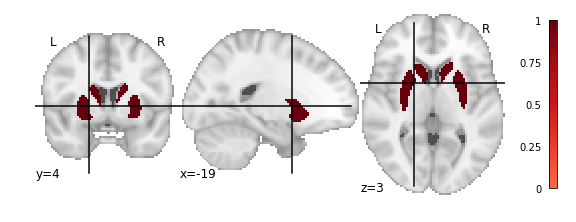

In [2]:
import sklearn as skl
import seaborn as sb
import pandas as pd
import numpy as np
import sys
sys.path.append('/usr/local/lib/python2.7/dist-packages')
from nilearn.image import iter_img, mean_img
from nilearn.plotting import plot_stat_map, show



import nilearn
from numpy import genfromtxt

from nilearn.decomposition import DictLearning, CanICA
data=genfromtxt('/data/projects/ppi-effect-sizes/data/rest_n20_REST1.txt',dtype=None)
n_components=40
from nilearn.image import load_img

print data[1:10]
mask_img=load_img("/data/projects/ppi-effect-sizes/data/ICA_tools/StriatumMask_atlas.nii")
plot_stat_map(mask_img,cmap='Reds')
show()


In [3]:
run1=load_img(data[0])

In [7]:

canica=CanICA(mask_img, n_components=5,memory="nilearn_cache",memory_level=10, smoothing_fwhm=None,threshold=0.,verbose=10,n_jobs=5, random_state=0)


canica.fit(data[1])

[MultiNiftiMasker.fit] Loading data from None
[MultiNiftiMasker.transform] Resampling mask
[CanICA] Loading data
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/data/projects/ppi-effect-sizes/data/100307/MNINonLinear/Results/rfMRI_REST1_RL/rfMRI_REST1_RL_hp2000_clean.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.035303, ..., -0.003767],
       ...,
       [-0.006848, ...,  0.009239]], dtype=float32), n_iter=3, random_state=0, transpose=True, n_components=20)
___________________________________________________randomized_svd - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition.fastica_.fastica...
fastica(array([[0.008283, ...

[Parallel(n_jobs=5)]: Done   3 out of  10 | elapsed:    4.2s remaining:    9.8s


__________________________________________________________fastica - 4.7s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition.fastica_.fastica...
fastica(array([[0.008283, ..., 0.023288],
       ...,
       [0.001657, ..., 0.009246]]), fun='cube', random_state=1819583497, whiten=True)
__________________________________________________________fastica - 2.3s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition.fastica_.fastica...
fastica(array([[0.008283, ..., 0.023288],
       ...,
       [0.001657, ..., 0.009246]]), fun='cube', random_state=530702035, whiten=True)


[Parallel(n_jobs=5)]: Done   5 out of  10 | elapsed:    5.0s remaining:    5.0s


__________________________________________________________fastica - 5.8s, 0.1min
__________________________________________________________fastica - 4.7s, 0.1min


[Parallel(n_jobs=5)]: Done   7 out of  10 | elapsed:    7.0s remaining:    3.0s


__________________________________________________________fastica - 3.1s, 0.1min
__________________________________________________________fastica - 3.3s, 0.1min
__________________________________________________________fastica - 3.5s, 0.1min


[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    8.4s finished


CanICA(detrend=True, do_cca=True, high_pass=None, low_pass=None,
    mask=<nibabel.nifti1.Nifti1Image object at 0x7f2ffe693dd0>,
    mask_args=None, mask_strategy='epi',
    memory=Memory(cachedir='nilearn_cache/joblib'), memory_level=4,
    n_components=20, n_init=10, n_jobs=5, random_state=0,
    smoothing_fwhm=None, standardize=True, t_r=None, target_affine=None,
    target_shape=None, threshold=0.0, verbose=10)

In [9]:
canica.components_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# Retrieve the independent components in brain space. Directly
# accesible through attribute `components_img_`. Note that this
# attribute is implemented from version 0.4.1. For older versions,
# see note section above for details.
components_img = canica.components_img_
# components_img is a Nifti Image object, and can be saved to a file with
# the following line:
components_img.to_filename('canica_resting_state.nii.gz')



for i, cur_img in enumerate(iter_img(components_img)):
    plot_stat_map(cur_img, display_mode="z", title="IC %d" % i,
                  cut_coords=1, colorbar=False)
